In [1]:
import utils
import matplotlib.pyplot as plt
import numpy as np

number of common Subjects  171


In [2]:
data,mask,scan,gtab,grad = utils.load_hcp('130114','3T',crop = 30)

In [3]:
data_mean = utils.mean_volume(data,gtab,5)

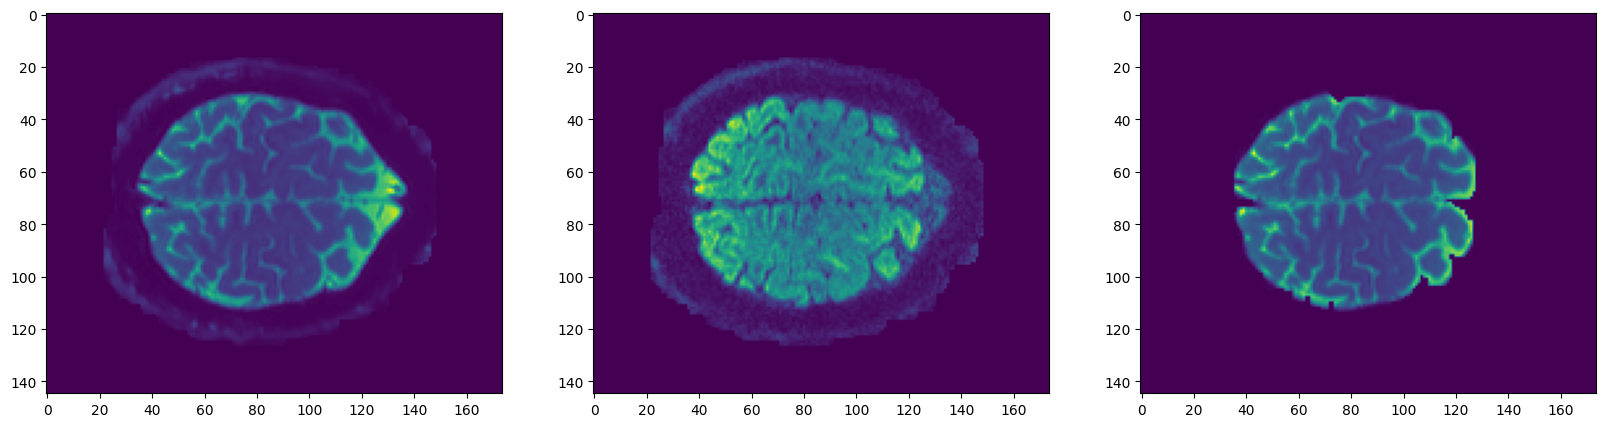

In [4]:
i=70
f, axis = plt.subplots(1, 3)
f.set_figwidth(20)
f.set_figheight(10)
axis[0].imshow(data_mean[:,:,i])
axis[1].imshow(data[:,:,i,1])
axis[2].imshow(mask[:,:,i]*data_mean[:,:,i])

## Ground Truth
* Diffusion image with all volumes
* b0 in this case is mean of all b = 5 volumes
* dwis contains all other volumes along with bvecs and bvals to compute apparent diffusion coefficients

In [5]:
dwis = data[:,:,:,np.where(gtab.bvals>5)].squeeze()
b0 = utils.mean_volume(data,gtab,5)
bvals = gtab.bvals[np.where(gtab.bvals>5)]
bvecs = gtab.bvecs[np.where(gtab.bvals>5)]
dwis_gt,tensor_gt = utils.diff_coefficent(dwis,b0,bvecs,bvals,shp = data.shape,bval_synth = 1000)
dti_gt = utils.dtimetric(tensor_gt, mask);

/home/arihant/DWI_SR/HCP_SR/utils.py:146: RuntimeWarning: divide by zero encountered in divide
  adcs = np.log(dwis / b0); # s = b0 * exp(-b * adc)
/home/arihant/DWI_SR/HCP_SR/utils.py:146: RuntimeWarning: invalid value encountered in divide
  adcs = np.log(dwis / b0); # s = b0 * exp(-b * adc)
/home/arihant/DWI_SR/HCP_SR/utils.py:146: RuntimeWarning: divide by zero encountered in log
  adcs = np.log(dwis / b0); # s = b0 * exp(-b * adc)
/home/arihant/DWI_SR/HCP_SR/utils.py:119: RuntimeWarning: invalid value encountered in double_scalars
  FA = np.sqrt(sum((D-MD) ** 2)) / np.sqrt(sum(D**2)) * np.sqrt(1.5)


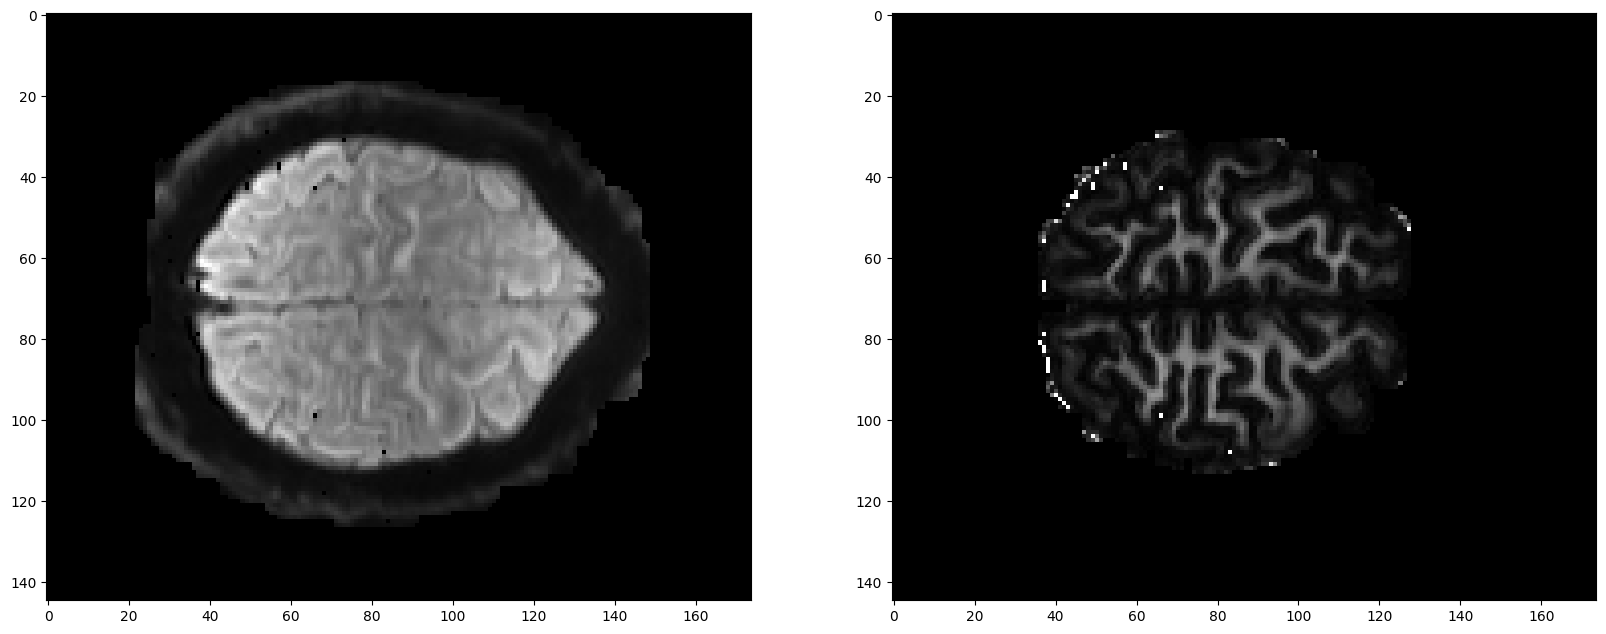

In [9]:
i=70
f, axis = plt.subplots(1, 2)
f.set_figwidth(20)
f.set_figheight(10)
axis[0].imshow(dwis_gt[:,:,i,2],cmap='gray')
axis[1].imshow(dti_gt['fa'][:,:,i],cmap='gray')

## DSM thingy

* Generate data for CNN
* Next step we compute for optimal direction from the vectors in bvecs
* This returns a list of index which are the volume from the original data which correspond to the lowest condition number
* This list is used in the next step using the same function to compute the apparent diffusion coefficients

In [10]:
idx = utils.optimal_dirs(gtab,10000,5,debug = True,base_bval = 5)

/home/arihant/DWI_SR/HCP_SR/utils.py:186: RuntimeWarning: invalid value encountered in arccos
  ang_error = np.degrees(np.arccos(abs(dsm_rot @ dirs.T)))


Lowest Condition Number :  [1.40995166 1.41711997 1.43353753 1.43535359 1.43744881]


In [ ]:
bval_synth = 1000;
input_all = []
tensor_all = []
b0s = data[:,:,:,np.where(gtab.bvals==5)].squeeze()

for i in range(5):
    b0 = b0s[:,:,:,i]
    dwis6 =  dwis[:,:,:,idx[i]]
    bvals6 = bvals[idx[i]]
    bvecs6 = bvecs[idx[i]]
    dwis_pred,tensor_pred = utils.diff_coefficent(dwis6,b0,bvecs6,bvals6,shp = data.shape,bval_synth = 1000)
    dti = utils.dtimetric(tensor_pred, mask);
    tensor_all.append(tensor_pred)
    input_all.append(dwis_pred)
    
    

IndexError: list index out of range

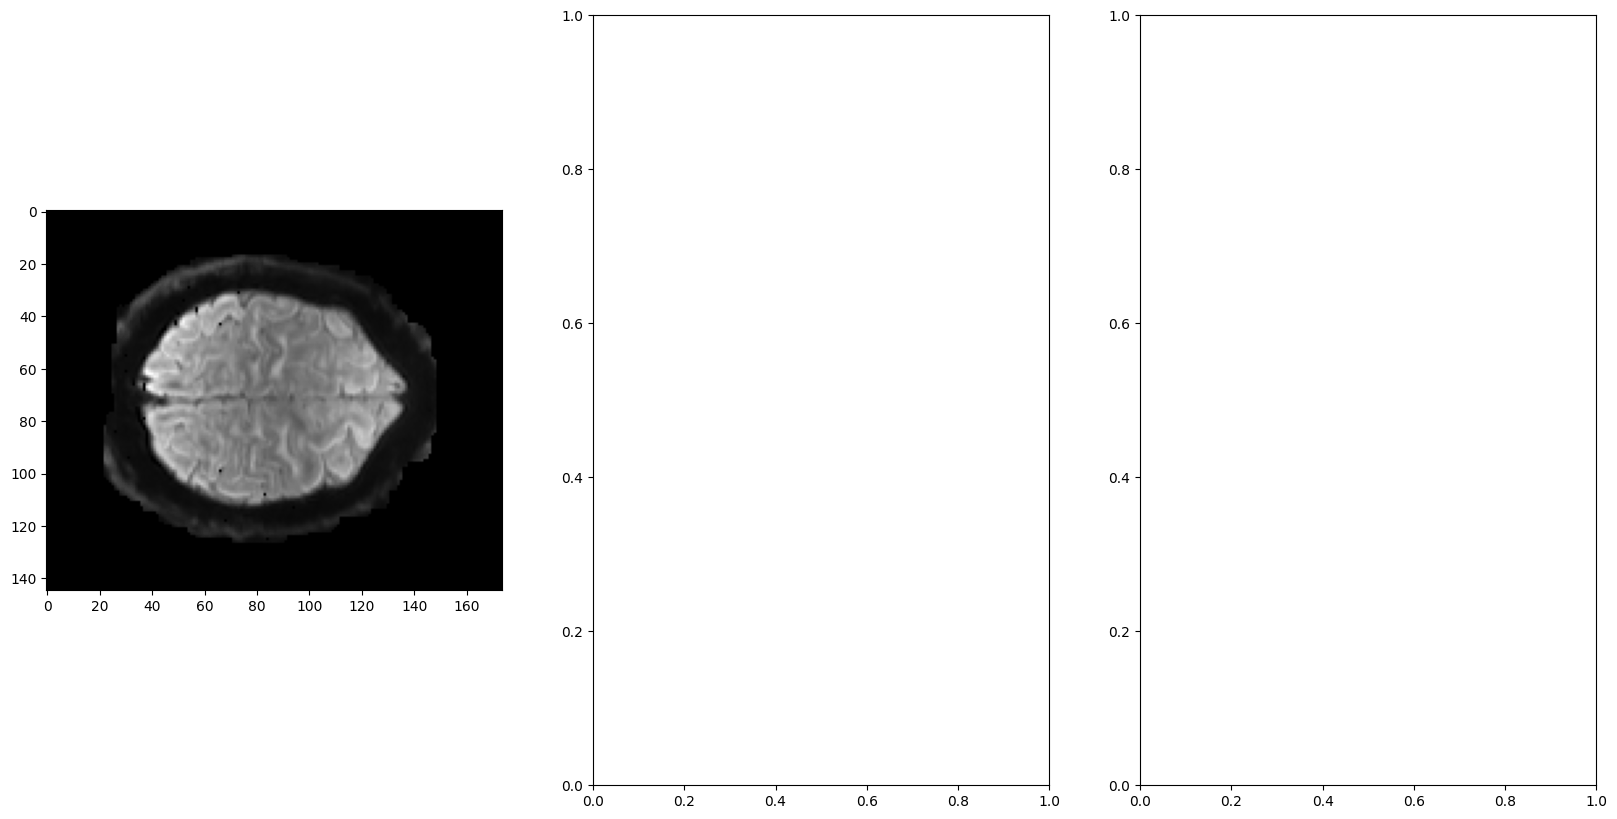

In [15]:
i=70
f, axis = plt.subplots(1, 3)
f.set_figwidth(20)
f.set_figheight(10)
axis[0].imshow(dwis_gt[:,:,i,2],cmap='gray')
axis[1].imshow(input_all[1][:,:,i,2],cmap='gray')
axis[1].imshow(dwis_gt[:,:,i,2] - input_all[1][:,:,i,2],cmap='gray')